In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import plotly.express as px
import plotly.graph_objects as go



data = pd.read_csv('crime_data.csv')
print(data.head())
print()
print(data.info())
print()
print(data.describe())



     Region  Population_Density  Poverty_Level  Police_Presence  \
0  Region_A                1824             38               67   
1  Region_B                1602             49               59   
2  Region_C                1220             26               75   
3  Region_D                 629             50               64   
4  Region_E                 828             39               44   

  Crime_Rate_Category  
0                 Low  
1                High  
2                 Low  
3             Between  
4                High  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region               26 non-null     object
 1   Population_Density   26 non-null     int64 
 2   Poverty_Level        26 non-null     int64 
 3   Police_Presence      26 non-null     int64 
 4   Crime_Rate_Category  26 non-null     object
dtypes:

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [ ]:
features = ['Population_Density', 'Poverty_Level', 'Police_Presence']
target = 'Crime_Rate_Category'

In [ ]:
X = data[features]
Y = data[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 42)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:", conf_matrix)
class_rep = classification_report(Y_test, Y_pred)
print("Classification Report", class_rep)


Confusion Matrix: [[0 0 1]
 [1 2 1]
 [2 0 1]]
Classification Report               precision    recall  f1-score   support

     Between       0.00      0.00      0.00         1
        High       1.00      0.50      0.67         4
         Low       0.33      0.33      0.33         3

    accuracy                           0.38         8
   macro avg       0.44      0.28      0.33         8
weighted avg       0.62      0.38      0.46         8



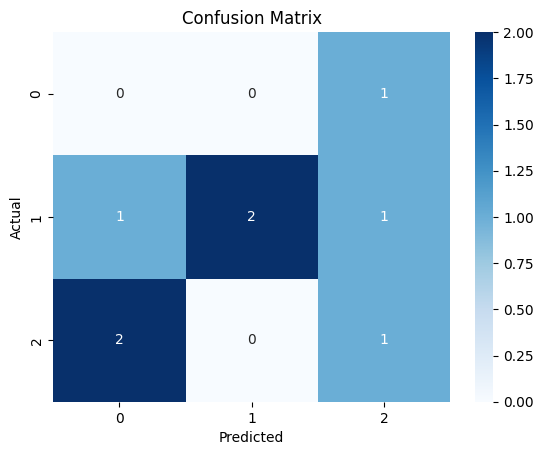

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

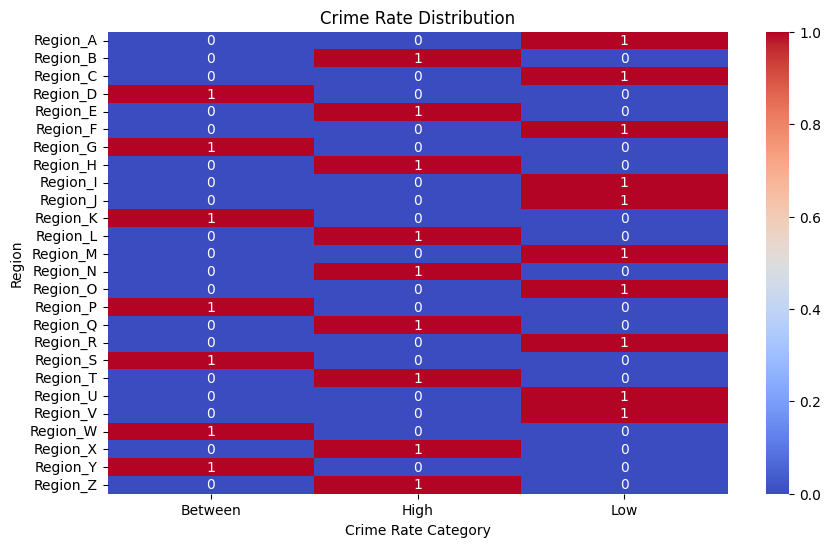

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.pivot_table(index='Region', columns='Crime_Rate_Category', aggfunc = 'size', fill_value = 0), cmap = 'coolwarm', annot=True)
plt.title('Crime Rate Distribution')
plt.xlabel('Crime Rate Category')
plt.ylabel('Region')
plt.show()


In [ ]:
fig = px.scatter(data, x='Population_Density', y='Poverty_Level', color='Crime_Rate_Category',
                 title='Population Density vs Poverty Level by Crime Rate Category',
                 labels={'Population_Density':'Population_Density', 'Poverty_Level':'Poverty_Level'})
fig.show()

In [ ]:
fig = px.box(data, x='Crime_Rate_Category', y='Police_Presence', color='Crime_Rate_Category',
             title='Police Presence by Crime Rate Category ',
             color_discrete_map={'Low':'green', 'Medium':'yellow', 'High':'red'})
fig.show()

   index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel sec